
----- Training Models for All Features -----

Soft Voting Ensemble (All Features) Metrics:
Accuracy: 0.9984359916189767
Precision: 0.998433193077954
Recall: 0.9984359916189767
F1 Score: 0.9984325693845205


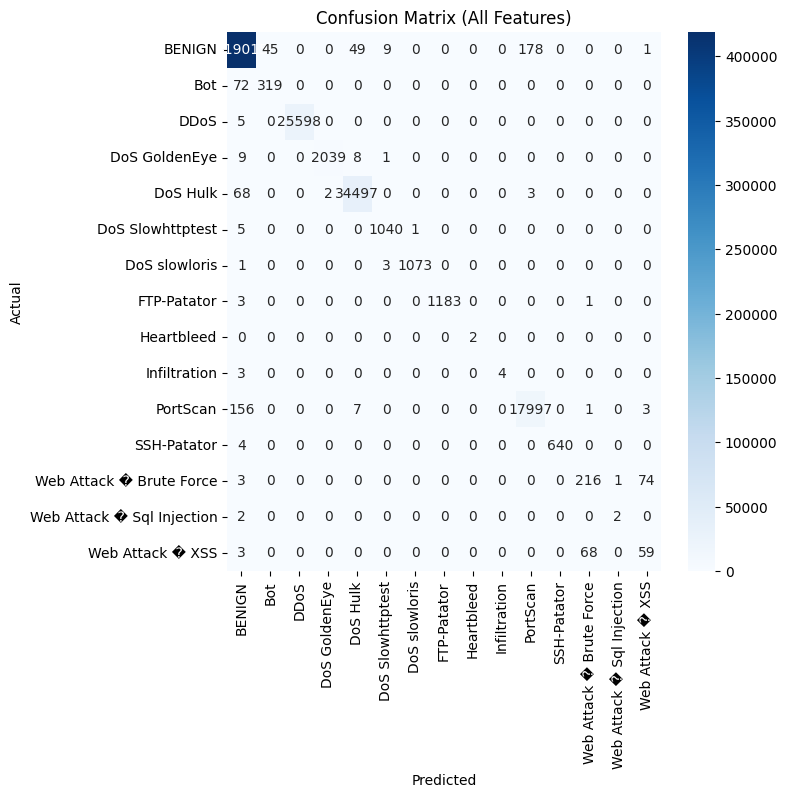


----- Training Models for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Soft Voting Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.9896030114594835
Precision: 0.9896447734953637
Recall: 0.9896030114594835
F1 Score: 0.988738512792724


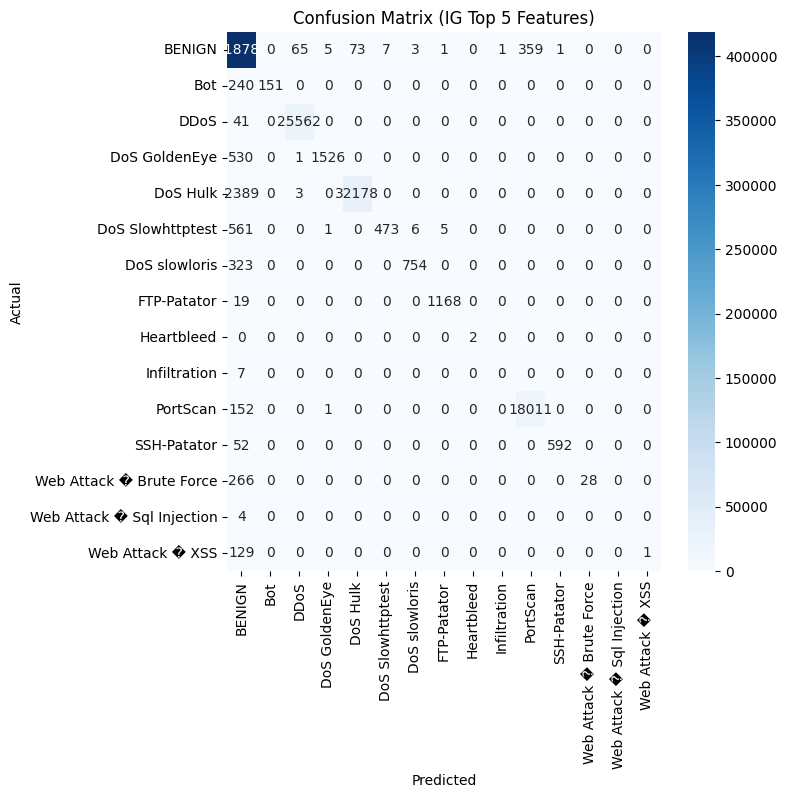


----- Training Models for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Soft Voting Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.9897021247916142
Precision: 0.9897468093051115
Recall: 0.9897021247916142
F1 Score: 0.988855455496379


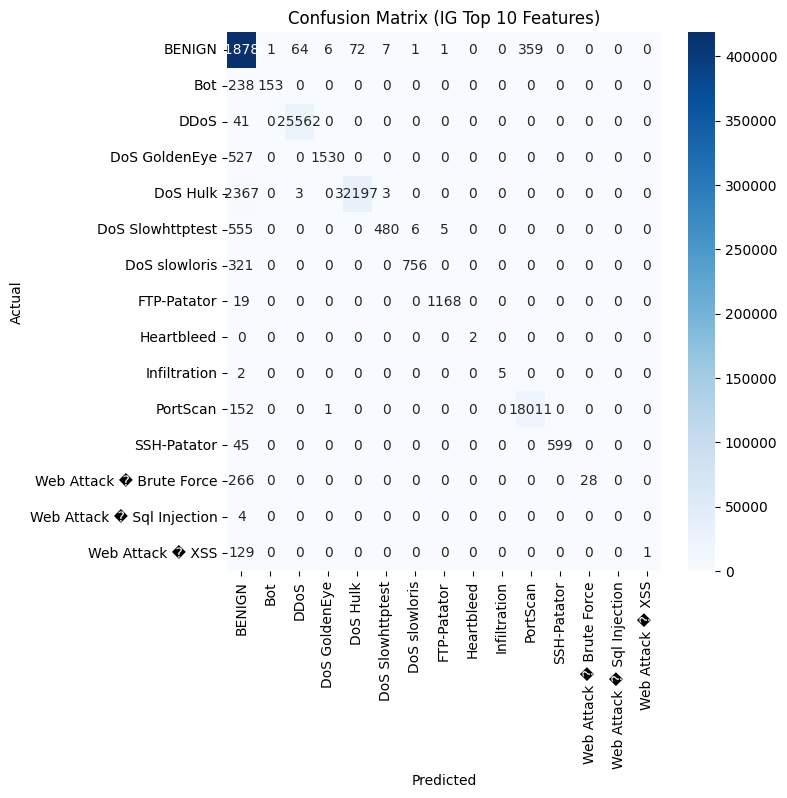


----- Training Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Soft Voting Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9620970795265554
Precision: 0.961090991525727
Recall: 0.9620970795265554
F1 Score: 0.9614515679331651


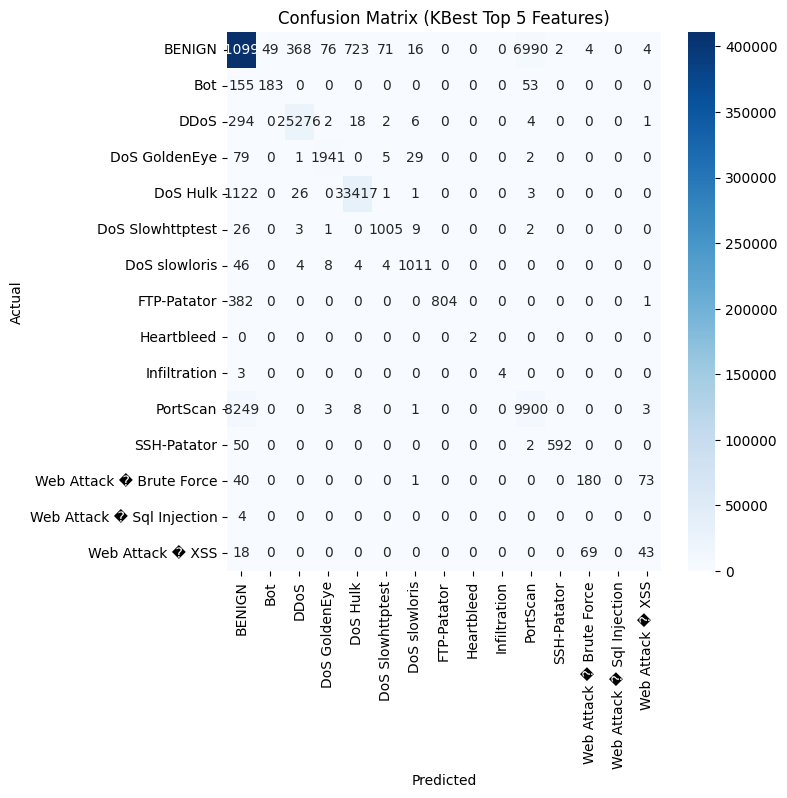


----- Training Models for KBest Top 10 Features -----

Soft Voting Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9965706787082758
Precision: 0.9964902229279599
Recall: 0.9965706787082758
F1 Score: 0.9964957947874262


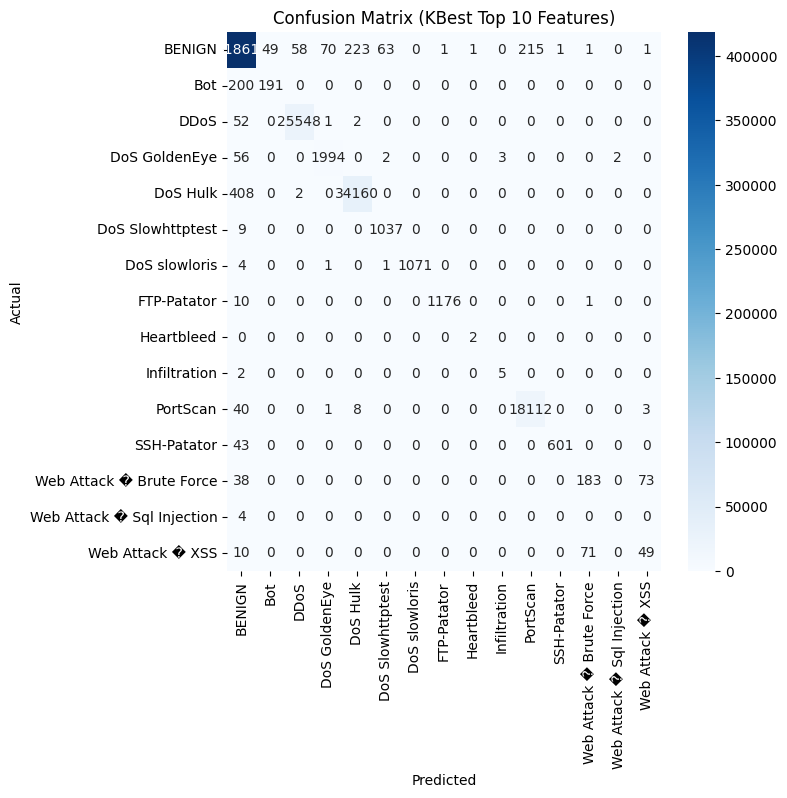

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import numpy as np

import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix

# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Models for {name} -----")

    start_time = time.time()

    model1 = DecisionTreeClassifier()
    model2 = KNeighborsClassifier(n_neighbors=5)
    model3 = RandomForestClassifier()

    model1.fit(X_tr, y_train)
    model2.fit(X_tr, y_train)
    model3.fit(X_tr, y_train)

    train_end_time = time.time()

    pred1 = model1.predict_proba(X_te)
    pred2 = model2.predict_proba(X_te)
    pred3 = model3.predict_proba(X_te)

    final_pred = (pred1 + pred2 + pred3) / 3

    # Convert probabilities to class predictions
    final_class_pred_enc = np.argmax(final_pred, axis=1)

    pred_end_time = time.time()

    metrics = evaluate_model(y_test, final_class_pred_enc, f"Soft Voting Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, final_class_pred_enc, le.classes_, f"Confusion Matrix ({name})")


In [10]:
# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Avg_ensemble_classifier_evaluation_summary.csv", index=False)


Summary of Results:
                                          Model  Accuracy  Precision  \
0           Soft Voting Ensemble (All Features)  0.998436   0.998433   
1      Soft Voting Ensemble (IG Top 5 Features)  0.989603   0.989645   
2     Soft Voting Ensemble (IG Top 10 Features)  0.989702   0.989747   
3   Soft Voting Ensemble (KBest Top 5 Features)  0.962097   0.961091   
4  Soft Voting Ensemble (KBest Top 10 Features)  0.996571   0.996490   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.998436  0.998433        1302.166779           516.757087     1818.923866  
1  0.989603  0.988739         392.431920           487.838856      880.270776  
2  0.989702  0.988855         597.981909           736.067309     1334.049218  
3  0.962097  0.961452         427.284608            32.370183      459.654792  
4  0.996571  0.996496         647.878484            24.931601      672.810085  
